## K-Means++ 

### Handle latitude/longitude in predictions 


In [1]:
# import relevant libaries 
from vincenty import vincenty
import numpy as np 
import pandas as pd 
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
# read in the trip data 
df_final = pd.read_csv("../data/processed/dortmund_trips.csv",index_col=0)

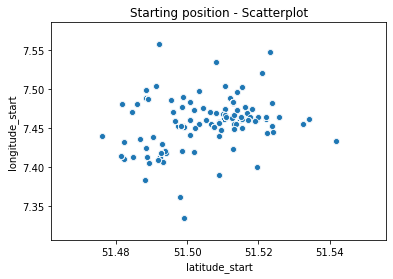

In [3]:
# scatterplot for starting positions of trips 
sns.scatterplot(x="latitude_start", y = "longitude_start", data=df_final)
plt.title("Starting position - Scatterplot")
plt.show()

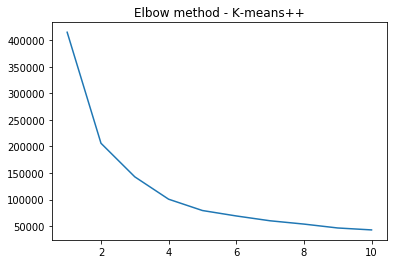

In [4]:
st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(df_final[["latitude_start","longitude_start"]])

k_max = 10
clusters = []
losses = []

# elbow method to specify the appropriate number of cluster
for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.title("Elbow method - K-means++")
plt.show()

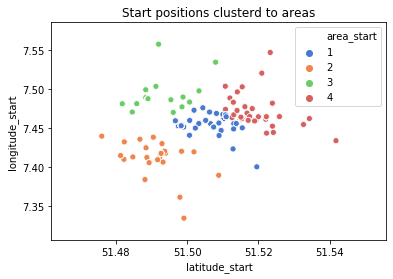

In [5]:
# due to the elbow method number of clusters are set to 4 
km = KMeans(n_clusters = 4)
km.fit(X_scaled)
df_final["area_start"] = km.predict(X_scaled)+1

sns.scatterplot(x="latitude_start", y="longitude_start", data=df_final, hue="area_start", palette="muted")
plt.title("Start positions clusterd to areas")
plt.show()

We get the start positions of the trips summed up to four different areas in the city (North-West, South-West, City-Center and North-East). 
This feature could be very useful for the predictions in task 3. 